In [180]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import cv2
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [61]:
path = '/content/drive/MyDrive/lfw/'

In [349]:
def preprocess(img):
  #cv2_imshow(img)
  clf = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
  
  #image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  
  gray = np.array(gray, dtype='uint8')
  faces = clf.detectMultiScale(gray, 1.1, 3)
  
  cropped_img=0
  for (x, y, w, h) in faces:
    cropped_img = img[x:x+w,y:y+w]
  #cv2_imshow(cropped_img)
  #print(cropped_img.shape)
  return cv2.resize(cropped_img, (256, 256))

In [350]:
datagen = ImageDataGenerator(preprocessing_function=preprocess, validation_split=0.2, rescale=1./255)
train_gen = datagen.flow_from_directory(path, subset='training')
test_gen = datagen.flow_from_directory(path, subset='validation')

Found 12161 images belonging to 5749 classes.
Found 1072 images belonging to 5749 classes.


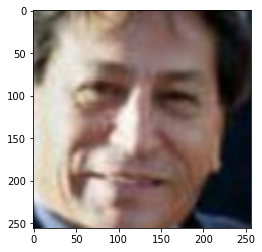

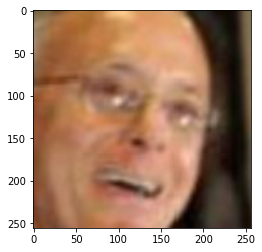

In [351]:
#just checks to make sure the images have successfully been cropped
x_batch,_ = train_gen.next()
for i in range (0,2):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()